<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/K_clustering_tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reflection on K-Means Clustering Lab

In this lab, I learned how K-Means clustering, an unsupervised machine learning algorithm, works. Unlike supervised learning, K-Means does not use labels. Instead, it groups data based on similarities, which helped me understand how patterns can be found in data automatically.

I used a country dataset that included information such as health spending and income. I selected these two features and prepared the data so it could be used by the algorithm. This helped me understand the importance of choosing the right features before applying any machine learning model.

I also learned how to find the best number of clusters using the Elbow Method. By using the elbow graph, I decided that three clusters were suitable for this dataset. After applying K-Means, the countries were grouped into low, medium, and high income-health categories, which made sense in real life.

Overall, this lab helped me understand how unsupervised learning works and how K-Means can be used to analyze real-world data.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.info()
X= df['health']
Y=df['income']
import numpy as np
data=np.array(list(zip(X,Y)))
data
X


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,health
0,7.58
1,6.55
2,4.17
3,2.85
4,6.03
...,...
162,5.25
163,4.91
164,6.84
165,5.18


In [ ]:
# same thing using index location
xx = df.iloc[:,[3,5]]
xx

,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100
...,...,...
162,5.25,2950
163,4.91,16500
164,6.84,4490
165,5.18,4480


167 rows × 2 columns

In k-means, it is essential to provide the numbers of the cluster to form from the data. In the dataset, we knew that there are four clusters. But, when we do not know the number of numbers of the cluster, we have to use methods such as Elbow or Silhouette methods for finding the optimal number of clusters in the dataset. Here, I will use the Elbow method to find the optimal number of clusters.

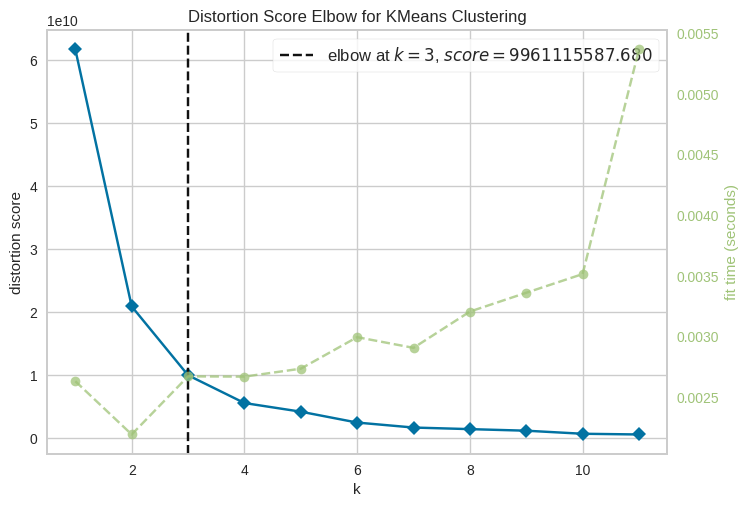

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [ ]:
<matplotlib.axes._subplots.AxesSubplot at 0x7ff4e318ce10>

SyntaxError: invalid syntax (ipython-input-2757030334.py, line 1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [ ]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
#We assign the labels to each row in dataframe.
df["Clus_km"] = kmeans.labels_
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,Clus_km
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,2


In [ ]:
kmeans.cluster_centers_

In [ ]:
array([[6.33650407e+00, 7.91839837e+03],
       [4.74833333e+00, 8.44833333e+04],
       [8.69315789e+00, 3.63763158e+04]])

In [ ]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(1): 47, np.int32(2): 84, np.int32(0): 36})

In [ ]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.24444633110017505


Visualization of k-means clustering

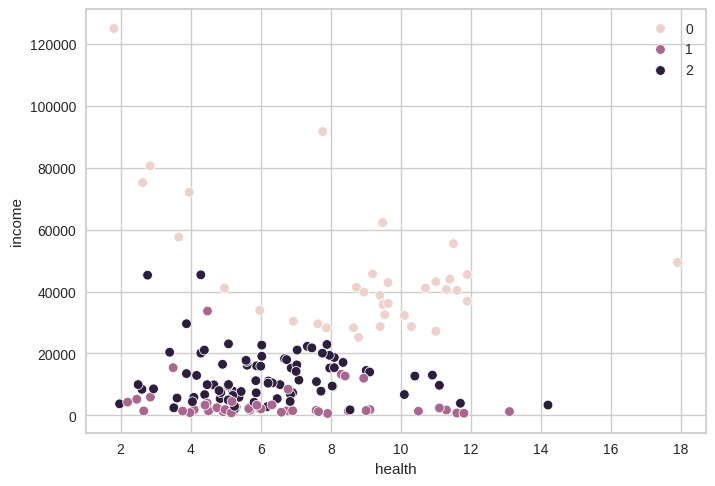

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="health", y="income", hue=kmeans.labels_)
plt.show()


Plot k-means clustering plot with centroids,

In [ ]:
newdata=[[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['health','income'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Health
- Income
Feature names seen at fit time, yet now missing:
- child_mort
- exports
- gdpp
- health
- imports
- ...
